![](http://https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/Erythema_migrans_-_erythematous_rash_in_Lyme_disease_-_PHIL_9875.jpg/310px-Erythema_migrans_-_erythematous_rash_in_Lyme_disease_-_PHIL_9875.jpg)

## Libraries

In [1]:
import pandas as pd
import numpy as np 
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model 
from keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
import keras
import os

Using TensorFlow backend.


##  Data Preprocessing

In [2]:
# load the image
image1 = Image.open('D:/Personal files/Data science and AI/Kaggle/Lyme Disease Classification/RashData/Validation/Validation_2_Cases/Lyme_Positive/erythema migrans30.jpg')

# summarize some details about the image
print(image1.format)
print(image1.mode)
print(image1.size)

# load the image
image2 = Image.open('D:\Personal files\Data science and AI\Kaggle\Lyme Disease Classification\RashData\Lyme_Negative_By_Disease\Drug Rash/fixed drug reaction18.jpg')

# summarize some details about the image
print(image2.format)
print(image2.mode)
print(image2.size)
pixels = asarray(image1)

JPEG
RGB
(311, 480)
JPEG
RGB
(380, 285)


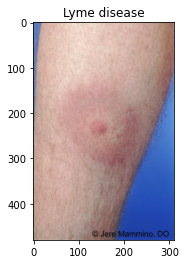

In [3]:
plt.title('Lyme disease')
imgplot = plt.imshow(image1)
plt.show()

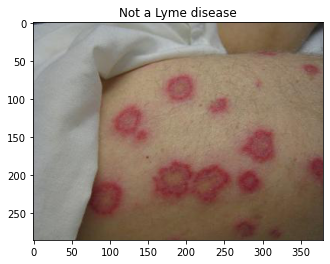

In [4]:
plt.title('Not a Lyme disease')
imgplot = plt.imshow(image2)
plt.show()

In [5]:
TRAIN_DIR = 'D:/Personal files/Data science and AI/Kaggle/Lyme Disease Classification/RashData/Train/Train_2_Cases'

TEST_DIR = 'D:/Personal files/Data science and AI/Kaggle/Lyme Disease Classification/RashData/Validation/Validation_2_Cases'

In [6]:
HEIGHT = 128
WIDTH = 128

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
dropout = 0.5
NUM_EPOCHS = 200
BATCH_SIZE = 8

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   rotation_range = 90,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 90,
                                  horizontal_flip = True,
                                  vertical_flip = False)

In [8]:
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size = (HEIGHT, WIDTH),
                                                    batch_size = BATCH_SIZE)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (HEIGHT, WIDTH),
                                                  batch_size = BATCH_SIZE)

Found 357 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


## Modeling (Resnet 50)

In [9]:
def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        print(fc)
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    preditions = Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs = base_model.input, outputs = preditions)
    return finetune_model

base_model_1 = ResNet50(weights = 'imagenet',
                       include_top = False,
                       input_shape = (HEIGHT, WIDTH, 3))

resnet50_model = build_model(base_model_1,
                                      dropout = dropout,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))

adam = Adam(lr = 0.00001)
resnet50_model.compile(adam, loss="binary_crossentropy", metrics=["accuracy"])

filepath = "./checkpoints" + "RestNet50" + "_model_weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor = ["acc"], verbose= 1, mode = "max")
cb=TensorBoard(log_dir=("/home/ubuntu/"))
callbacks_list = [checkpoint, cb]

#print(train_generator.class_indices)

resnet50_model.summary()

C:\ProgramData\Anaconda3\envs\gputest\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


1024
512
256
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
_______________________________________________________________________________

In [10]:
history = resnet50_model.fit_generator(generator = train_generator, epochs = NUM_EPOCHS, steps_per_epoch = 100, 
                                       shuffle = True, validation_data = test_generator)

Epoch 1/200


C:\ProgramData\Anaconda3\envs\gputest\lib\site-packages\PIL\Image.py:974: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 11s 113ms/step - loss: 1.8807 - accuracy: 0.4962 - val_loss: 0.8453 - val_accuracy: 0.6207
Epoch 2/200
100/100 [==============================] - 7s 69ms/step - loss: 1.6745 - accuracy: 0.5247 - val_loss: 0.4109 - val_accuracy: 0.6207
Epoch 3/200
100/100 [==============================] - 8s 76ms/step - loss: 1.5337 - accuracy: 0.5295 - val_loss: 0.2253 - val_accuracy: 0.6897
Epoch 4/200
100/100 [==============================] - 7s 74ms/step - loss: 1.4431 - accuracy: 0.5322 - val_loss: 0.2716 - val_accuracy: 0.5862
Epoch 5/200
100/100 [==============================] - 8s 77ms/step - loss: 1.3841 - accuracy: 0.5171 - val_loss: 0.4798 - val_accuracy: 0.6552
Epoch 6/200
100/100 [==============================] - 8s 78ms/step - loss: 1.1934 - accuracy: 0.5453 - val_loss: 0.8363 - val_accuracy: 0.7011
Epoch 7/200
100/100 [==============================] - 8s 85ms/step - loss: 1.2015 - accuracy: 0.5583 - val_loss: 0.5734 - val_accuracy: 0.7011
Ep

100/100 [==============================] - 8s 82ms/step - loss: 0.4464 - accuracy: 0.7914 - val_loss: 0.6630 - val_accuracy: 0.8046
Epoch 58/200
100/100 [==============================] - 8s 83ms/step - loss: 0.5366 - accuracy: 0.7494 - val_loss: 0.2159 - val_accuracy: 0.8046
Epoch 59/200
100/100 [==============================] - 10s 98ms/step - loss: 0.5458 - accuracy: 0.7343 - val_loss: 0.3834 - val_accuracy: 0.7816
Epoch 60/200
100/100 [==============================] - 9s 86ms/step - loss: 0.5311 - accuracy: 0.7506 - val_loss: 0.3307 - val_accuracy: 0.7816
Epoch 61/200
100/100 [==============================] - 9s 85ms/step - loss: 0.5472 - accuracy: 0.7434 - val_loss: 0.2284 - val_accuracy: 0.7816
Epoch 62/200
100/100 [==============================] - 9s 87ms/step - loss: 0.5013 - accuracy: 0.7720 - val_loss: 0.8417 - val_accuracy: 0.7816
Epoch 63/200
100/100 [==============================] - 9s 87ms/step - loss: 0.5168 - accuracy: 0.7481 - val_loss: 0.2752 - val_accuracy: 0.79

Epoch 113/200
100/100 [==============================] - 9s 86ms/step - loss: 0.4169 - accuracy: 0.8161 - val_loss: 1.2236 - val_accuracy: 0.6897
Epoch 114/200
100/100 [==============================] - 9s 89ms/step - loss: 0.3941 - accuracy: 0.8174 - val_loss: 0.4389 - val_accuracy: 0.6897
Epoch 115/200
100/100 [==============================] - 9s 90ms/step - loss: 0.3844 - accuracy: 0.8281 - val_loss: 0.7639 - val_accuracy: 0.6897
Epoch 116/200
100/100 [==============================] - 8s 84ms/step - loss: 0.3689 - accuracy: 0.8312 - val_loss: 0.4542 - val_accuracy: 0.6667
Epoch 117/200
100/100 [==============================] - 9s 91ms/step - loss: 0.3899 - accuracy: 0.8363 - val_loss: 0.0652 - val_accuracy: 0.6667
Epoch 118/200
100/100 [==============================] - 9s 89ms/step - loss: 0.3350 - accuracy: 0.8564 - val_loss: 0.1875 - val_accuracy: 0.6897
Epoch 119/200
100/100 [==============================] - 8s 84ms/step - loss: 0.3441 - accuracy: 0.8589 - val_loss: 0.8701 -

Epoch 169/200
100/100 [==============================] - 9s 86ms/step - loss: 0.3024 - accuracy: 0.8690 - val_loss: 1.2075 - val_accuracy: 0.6897
Epoch 170/200
100/100 [==============================] - 10s 99ms/step - loss: 0.2369 - accuracy: 0.8980 - val_loss: 1.4233 - val_accuracy: 0.7011
Epoch 171/200
100/100 [==============================] - 10s 100ms/step - loss: 0.2919 - accuracy: 0.8640 - val_loss: 0.6898 - val_accuracy: 0.7471
Epoch 172/200
100/100 [==============================] - 8s 80ms/step - loss: 0.2787 - accuracy: 0.8774 - val_loss: 0.1369 - val_accuracy: 0.7241
Epoch 173/200
100/100 [==============================] - 9s 93ms/step - loss: 0.2948 - accuracy: 0.8753 - val_loss: 1.5303 - val_accuracy: 0.7356
Epoch 174/200
100/100 [==============================] - 8s 85ms/step - loss: 0.2525 - accuracy: 0.8896 - val_loss: 0.5716 - val_accuracy: 0.7586
Epoch 175/200
100/100 [==============================] - 8s 81ms/step - loss: 0.2526 - accuracy: 0.9131 - val_loss: 0.938

In [11]:
resnet50_model.save("model.h5")

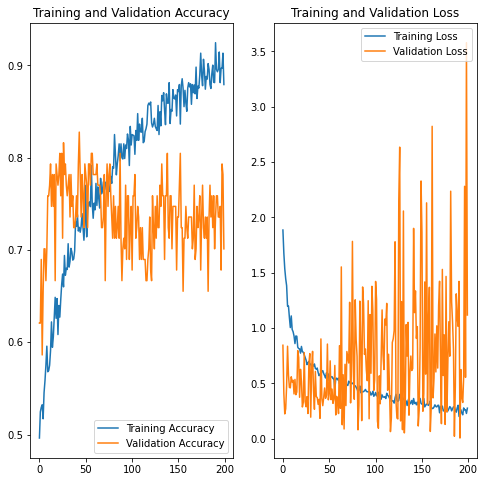

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()